# Exploratory Data Analysis

Chapter 4

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from distribution import Pmf, Cdf

In [2]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')

CPU times: user 180 ms, sys: 28 ms, total: 208 ms
Wall time: 312 ms


In [3]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [4]:
rows = brfss['_VEGESU1'] > 8
brfss.loc[rows, '_VEGESU1'] = 8

In [5]:
from scipy.stats import linregress

subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

res = linregress(xs, ys)
res

LinregressResult(slope=0.07046729822137487, intercept=1.5140054866876373, rvalue=0.1280026484687731, pvalue=6.0642347876100535e-273, stderr=0.001988046449262333)

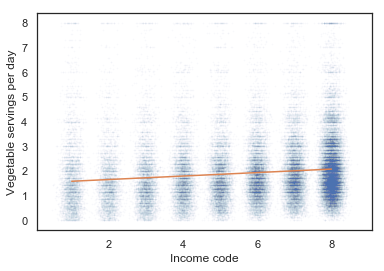

In [6]:
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', markersize=1, alpha=0.02)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')

fx1 = np.array([xs.min(), xs.max()])
fy1 = res.intercept + res.slope * fx1

plt.plot(fx1, fy1, '-', color='C1')

#plt.ylim([-0.5, 8])
plt.savefig('figs/veggie_income_reg1.png')

In [7]:
xs = subset['_VEGESU1']
ys = subset['INCOME2']

res = linregress(xs, ys)
res

LinregressResult(slope=0.23251463343390016, intercept=5.399902962910681, rvalue=0.1280026484687731, pvalue=6.0642347876100535e-273, stderr=0.006559778834540071)

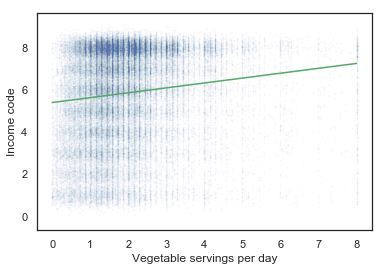

In [8]:
y_jitter = ys + np.random.normal(0, 0.3, len(xs))
plt.plot(xs, y_jitter, 'o', markersize=1, alpha=0.02)

plt.ylabel('Income code')
plt.xlabel('Vegetable servings per day')

fx2 = np.array([xs.min(), xs.max()])
fy2 = res.intercept + res.slope * fx2

plt.plot(fx2, fy2, '-', color='C2')

#plt.xlim([-0.5, 8])
plt.savefig('figs/veggie_income_reg2.png')

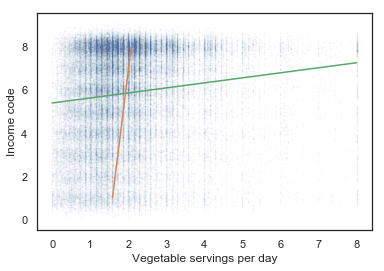

In [9]:
y_jitter = ys + np.random.normal(0, 0.3, len(xs))
plt.plot(xs, y_jitter, 'o', markersize=1, alpha=0.02)

plt.ylabel('Income code')
plt.xlabel('Vegetable servings per day')

fx2 = np.array([xs.min(), xs.max()])
fy2 = res.intercept + res.slope * fx2

plt.plot(fx2, fy2, '-', color='C2')
plt.plot(fy1, fx1, '-', color='C1')

#plt.xlim([-0.5, 8])
plt.savefig('figs/veggie_income_reg3.png')

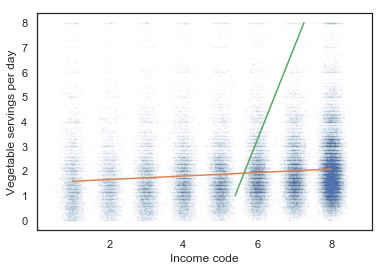

In [10]:
xs = subset['INCOME2']
ys = subset['_VEGESU1']

res = linregress(xs, ys)
res

x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', markersize=1, alpha=0.02)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')

fx1 = np.array([xs.min(), xs.max()])
fy1 = res.intercept + res.slope * fx1

plt.plot(fx1, fy1, '-', color='C1')
plt.plot(fy2, fx1, '-', color='C2')

#plt.ylim([-0.5, 8])
plt.savefig('figs/veggie_income_reg4.png')

In [11]:
import statsmodels.formula.api as smf

model = smf.ols('INCOME2 ~ _VEGESU1', data=brfss)
model

In [12]:
results = model.fit()
results

In [13]:
results.params

Intercept    5.399903
_VEGESU1     0.232515
dtype: float64

In [14]:
results.rsquared

0.01638467801502075

In [15]:
np.sqrt(results.rsquared)

0.12800264846877485

In [16]:
columns = ['INCOME2', '_VEGESU1']
brfss[columns].corr()

,INCOME2,_VEGESU1
INCOME2,1.000000,0.128003
_VEGESU1,0.128003,1.000000


In [17]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 32.6 ms


(62466, 9)

In [18]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,adults,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,3.0,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,2.0,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,0.8893


In [19]:
gss.describe()

,year,age,cohort,sex,race,educ,realinc,adults,wtssall
count,62466.000000,62281.000000,62282.000000,62466.000000,62466.000000,62304.000000,55499.000000,62403.000000,62466.000000
mean,1994.072359,44.648320,1949.429996,1.541415,1.254955,12.831311,34702.430164,2.250228,1.213340
std,12.937941,17.072244,20.734302,0.498286,0.554694,3.117027,30665.659411,0.936869,0.585544
min,1972.000000,18.000000,1883.000000,1.000000,1.000000,0.000000,234.000000,1.000000,0.411898
25%,1984.000000,30.000000,1935.000000,1.000000,1.000000,12.000000,13750.000000,2.000000,0.918400
50%,1994.000000,43.000000,1951.000000,2.000000,1.000000,12.000000,26015.000000,2.000000,1.062100
75%,2006.000000,57.000000,1964.000000,2.000000,1.000000,15.000000,43426.000000,3.000000,1.515500
max,2016.000000,89.000000,1998.000000,2.000000,3.000000,20.000000,162607.000000,8.000000,8.739876


In [20]:
model = smf.ols('realinc ~ educ', data=gss)
model

In [21]:
results = model.fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

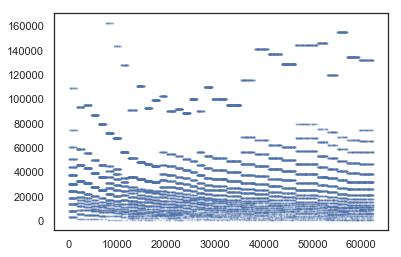

In [22]:
plt.plot(gss['realinc'], 'o', markersize=1, alpha=0.1)

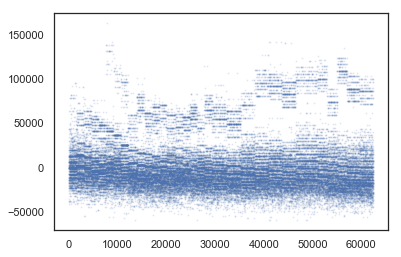

In [23]:
plt.plot(results.resid, 'o', markersize=1, alpha=0.1)

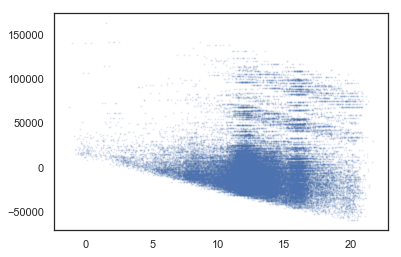

In [24]:
dropped = gss.dropna(subset=['realinc', 'educ'])
jitter_educ = dropped['educ'] + np.random.normal(0, 0.5, len(dropped))
plt.plot(jitter_educ, results.resid, 'o', markersize=1, alpha=0.1)

In [25]:
results.rsquared

0.1305975861675771

In [26]:
np.sqrt(results.rsquared)

0.3613828802912184

In [27]:
columns = ['educ', 'realinc']
gss[columns].corr()

,educ,realinc
educ,1.000000,0.361383
realinc,0.361383,1.000000


In [28]:
v0 = gss['realinc'].var()

In [29]:
v1 = results.resid.var()

In [30]:
1 - v1 / v0

0.1305991524510891

In [31]:
1 - np.sqrt(v1) / np.sqrt(v0)

0.06758332943425405

In [32]:
resid = results.resid.values.copy()
np.random.shuffle(resid)

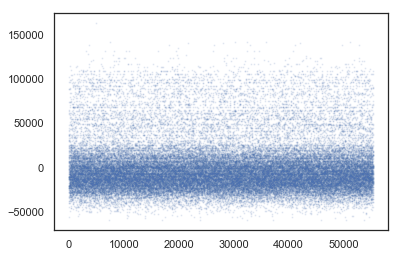

In [33]:
plt.plot(resid, 'o', markersize=1, alpha=0.1)

In [34]:
model = smf.ols('realinc ~ educ + age', data=gss)
results = model.fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

In [35]:
grouped = gss.groupby('age')
grouped

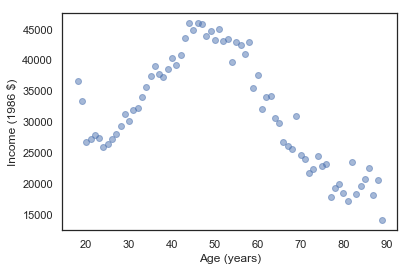

In [36]:
mean_income_by_age = grouped['realinc'].mean()

plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')

plt.savefig('figs/income_age1.png')

In [68]:
gss['age2'] = gss['age']**2
gss['educ2'] = gss['educ']**2

In [69]:
model = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss)
results = model.fit()
results.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

In [70]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2

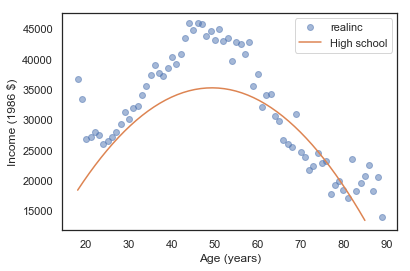

In [71]:
plt.plot(mean_income_by_age, 'o', alpha=0.5)

df['educ'] = 12
df['educ2'] = df['educ']**2
pred12 = results.predict(df)
plt.plot(df['age'], pred12, label='High school')

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

plt.savefig('figs/income_age2.png')

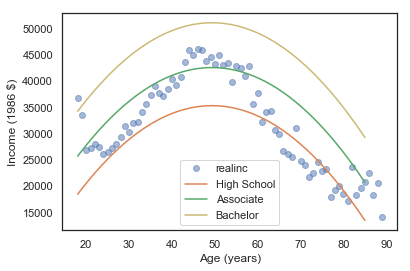

In [72]:
plt.plot(mean_income_by_age, 'o', alpha=0.5)

df['educ'] = 12
df['educ2'] = df['educ']**2
pred12 = results.predict(df)
plt.plot(df['age'], pred12, label='High School')

df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')

df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor', color='C8')

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

plt.savefig('figs/income_age3.png')

In [95]:
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

In [96]:
grouped = gss.groupby('educ')

mean_income_by_educ = grouped['realinc'].mean()

Text(0, 0.5, 'Income (1986 $)')

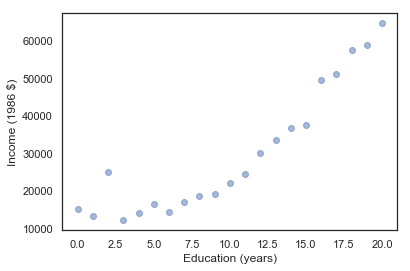

In [97]:
plt.plot(mean_income_by_educ, 'o', alpha=0.5)
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')

In [99]:
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['educ2'] = df['educ']**2
df['age'] = 30
df['age2'] = df['age']**2

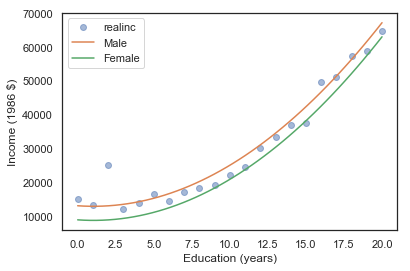

In [100]:
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

df['sex'] = 1
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Male')

df['sex'] = 2
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Female')

plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

In [48]:
model = smf.ols('realinc ~ educ + age + C(sex)', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realinc   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     2954.
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:21:32   Log-Likelihood:            -6.4617e+05
No. Observations:               55345   AIC:                         1.292e+06
Df Residuals:                   55341   BIC:                         1.292e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.354e+04    670.011    -20.213      0.000   -1.49e+04   -1.22e+04
C(sex)[T.2] -4478.1049    242.550    -18.463      0.000   -4953.504   -4002.706
educ         3637.6690     39.616     91.824      0.000    3560.022    3715.316
age            84.4430      7.362     11.471      0.000      70.014      98.872
==============================================================================
Omnibus:                    17112.429   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48386.179
Skew:                           1.651   Prob(JB):                         0.00
Kurtosis:                       6.174   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model = smf.ols('realinc ~ educ + age + C(sex) + C(race)', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realinc   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     1948.
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:21:33   Log-Likelihood:            -6.4579e+05
No. Observations:               55345   AIC:                         1.292e+06
Df Residuals:                   55339   BIC:                         1.292e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9805.2827    681.698    -14.384      0.000   -1.11e+04   -8469.149
C(sex)[T.2]  -4289.9683    241.042    -17.798      0.000   -4762.413   -3817.524
C(race)[T.2] -9816.2642    359.462    -27.308      0.000   -1.05e+04   -9111.716
C(race)[T.3] -3277.5210    521.076     -6.290      0.000   -4298.833   -2256.209
educ          3505.9933     39.642     88.442      0.000    3428.296    3583.691
age             69.6612      7.355      9.471      0.000      55.245      84.077
==============================================================================
Omnibus:                    17096.135   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48538.980
Skew:                           1.647   Prob(JB):                         0.00
Kurtosis:                       6.193   Cond. No.                         282.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
model = smf.ols('realinc ~ educ + age + age2 + C(sex) + C(race)', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realinc   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     2004.
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:21:33   Log-Likelihood:            -6.4484e+05
No. Observations:               55345   AIC:                         1.290e+06
Df Residuals:                   55338   BIC:                         1.290e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.209e+04    993.030    -42.382      0.000    -4.4e+04   -4.01e+04
C(sex)[T.2]  -4324.1009    236.928    -18.251      0.000   -4788.482   -3859.720
C(race)[T.2] -1.012e+04    353.393    -28.645      0.000   -1.08e+04   -9430.318
C(race)[T.3] -3265.5928    512.180     -6.376      0.000   -4269.469   -2261.717
educ          3286.1665     39.283     83.654      0.000    3209.171    3363.161
age           1758.0047     39.007     45.069      0.000    1681.551    1834.458
age2           -17.6906      0.402    -44.047      0.000     -18.478     -16.903
==============================================================================
Omnibus:                    17668.247   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52491.470
Skew:                           1.683   Prob(JB):                         0.00
Kurtosis:                       6.381   Cond. No.                     2.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2
df['race'] = 1
df['sex'] = 2

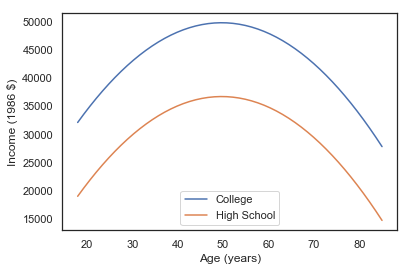

In [52]:
def plot_pred(results, df, educ, label):
    df['educ'] = educ
    pred_inc = results.predict(df)
    plt.plot(df['age'], pred_inc, label=label)

plot_pred(results, df, 16, 'College')
plot_pred(results, df, 12, 'High School')

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

In [53]:
white = gss['race'] == 1
male = gss['sex'] == 1
female = gss['sex'] == 2
hs = gss['educ'] == 12
college = gss['educ'] == 16

In [54]:
def plot_subset(subset, color):
    grouped = subset.groupby('age')
    income_age = grouped['realinc'].mean()
    plt.plot(income_age, 'o', color=color, alpha=0.5, label='')


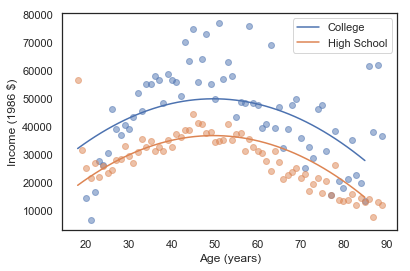

In [55]:
subset = gss[white & female & college]
plot_subset(subset, 'C0')

subset = gss[white & female & hs]
plot_subset(subset, 'C1')

plot_pred(results, df, 16, 'College')
plot_pred(results, df, 12, 'High School')

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

#plt.saveas()

In [56]:
subset = gss[white & male]
model = smf.ols('realinc ~ educ + age + age2', data=subset)
results = model.fit()
results.params

Intercept   -47259.618453
educ          3633.950010
age           1716.508037
age2           -16.685558
dtype: float64

In [57]:
subset = gss[white & female]
model = smf.ols('realinc ~ educ + age + age2', data=subset)
results = model.fit()
results.params

Intercept   -48389.535573
educ          3234.531876
age           1949.979197
age2           -20.224524
dtype: float64